<a href="https://colab.research.google.com/github/lordcrawford/cs230_genaifakes/blob/main/genaifakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pietrob92/wild-in-the-wild-image-linkage-dataset")

print("Path to dataset files:", path)

100%|██████████| 47.5G/47.5G [22:43<00:00, 37.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1


Contents of the dataset directory:

Found 1000th image: /root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1/Data/Open_Set/Tencent_Hunyuan/img_95.png


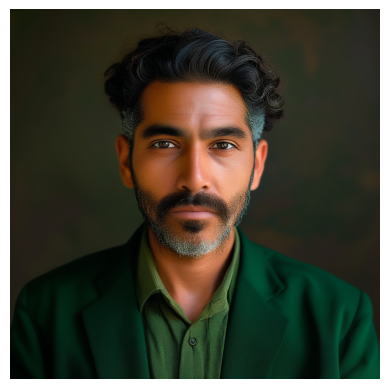

In [ ]:
# THIS IS JUST TO SEE THE IMAGE

import os
from PIL import Image
import matplotlib.pyplot as plt

print("Contents of the dataset directory:")
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

if len(image_files) >= 15000:
    image_path = image_files[49039] 
    print(f"\nFound 1000th image: {image_path}")
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error opening or displaying image: {e}")
else:
    print(f"\nOnly {len(image_files)} image files found in the dataset directory. Cannot display the 1000th image.")

In [ ]:
ai_models = [
    "Adobe Firefly",
    "Dall-E 3",
    "Flux.1",
    "Flux.1.1 Pro",
    "Freepik",
    "Leonardo AI",
    "Midjourney",
    "Stable Diffusion 3.5",
    "Stable Diffusion XL",
    "Starry AI"
]

print("Defined AI models list.")

Defined AI models list.


In [ ]:
import os

closed_set_images = []
closed_set_keyword = 'Closed_Set'

print(f"Starting to search for images with '{closed_set_keyword}' in their path...")

for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(root, file)
            if closed_set_keyword in image_path:
                closed_set_images.append(image_path)

print(f"Found {len(closed_set_images)} images containing '{closed_set_keyword}' in their path.")

Starting to search for images with 'Closed_Set' in their path...
Found 25000 images containing 'Closed_Set' in their path.


In [ ]:
categorized_images = {}
unmatched_images = []

print("Categorizing images by AI model...")

for image_path in closed_set_images:
    matched_model = None
    for model in ai_models:
        # We check for the model name case-insensitively
        if model.lower() in image_path.lower():
            if model not in categorized_images:
                categorized_images[model] = []
            categorized_images[model].append(image_path)
            matched_model = model
            break # Assuming an image belongs to only one model

    if matched_model is None:
        unmatched_images.append(image_path)

print("Finished categorizing images.")

Categorizing images by AI model...
Finished categorizing images.


In [ ]:
print("\n--- Image Categorization Summary ---")
for model, images in categorized_images.items():
    print(f"{model}: {len(images)} images")

print(f"Unmatched Images: {len(unmatched_images)} images")
print("------------------------------------")


--- Image Categorization Summary ---
Midjourney: 2500 images
Starry AI: 2500 images
Flux.1: 5000 images
Dall-E 3: 2500 images
Stable Diffusion XL: 2500 images
Leonardo AI: 2500 images
Stable Diffusion 3.5: 2500 images
Freepik: 2500 images
Adobe Firefly: 2500 images
Unmatched Images: 0 images
------------------------------------


In [ ]:
# Create a list of AI model names
ai_model_names = list(categorized_images.keys())

# Create a dictionary mapping each AI model name to a unique integer label
model_to_label = {model: i for i, model in enumerate(ai_model_names)}

print("AI Model Names:", ai_model_names)
print("Model to Label Mapping:", model_to_label)

AI Model Names: ['Midjourney', 'Starry AI', 'Flux.1', 'Dall-E 3', 'Stable Diffusion XL', 'Leonardo AI', 'Stable Diffusion 3.5', 'Freepik', 'Adobe Firefly']
Model to Label Mapping: {'Midjourney': 0, 'Starry AI': 1, 'Flux.1': 2, 'Dall-E 3': 3, 'Stable Diffusion XL': 4, 'Leonardo AI': 5, 'Stable Diffusion 3.5': 6, 'Freepik': 7, 'Adobe Firefly': 8}


In [ ]:
image_paths = []
labels = []

for model, paths in categorized_images.items():
    image_paths.extend(paths)
    label = model_to_label[model]
    labels.extend([label] * len(paths))

labels = np.array(labels)

print(f"Total number of image paths: {len(image_paths)}")
print(f"Total number of labels: {len(labels)}")
print(f"First 10 image paths: {image_paths[:10]}")
print(f"First 10 labels: {labels[:10]}")

Total number of image paths: 25000
Total number of labels: 25000
First 10 image paths: ['/root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1/Data/Post-Processed/Closed_Set/Midjourney/PP/step3/img_106_step1_WebP_Compression_step2_Blurring_step3_JPEG_Compression.png', '/root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1/Data/Post-Processed/Closed_Set/Midjourney/PP/step3/img_190_step1_Blurring_step2_Brightness_Increase_step3_Contrast_Increase.png', '/root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1/Data/Post-Processed/Closed_Set/Midjourney/PP/step3/img_196_step1_Blurring_step2_Central_Crop_step3_Resize.png', '/root/.cache/kagglehub/datasets/pietrob92/wild-in-the-wild-image-linkage-dataset/versions/1/Data/Post-Processed/Closed_Set/Midjourney/PP/step3/img_176_step1_Brightness_Increase_step2_Greyscale_step3_Blurring.png', '/root/.cache/kagglehub/datasets/pietrob92/wild-in

In [ ]:
from sklearn.model_selection import train_test_split

train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of validation images: {len(val_image_paths)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of validation labels: {len(val_labels)}")

Number of training images: 20000
Number of validation images: 5000
Number of training labels: 20000
Number of validation labels: 5000


## Create a data generator

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Define basic image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator

train_df = pd.DataFrame({'filename': train_image_paths, 'class': train_labels})
val_df = pd.DataFrame({'filename': val_image_paths, 'class': val_labels})

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw', 
    shuffle=False 
)

train_steps_per_epoch = len(train_image_paths) // BATCH_SIZE
val_steps_per_epoch = len(val_image_paths) // BATCH_SIZE

print(f"Training steps per epoch: {train_steps_per_epoch}")
print(f"Validation steps per epoch: {val_steps_per_epoch}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 150.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 213.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Found 20000 validated image filenames.
Found 5000 validated image filenames.
Training steps per epoch: 625
Validation steps per epoch: 156


## Build basic CNN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = len(model_to_label)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,481 (28.20 MB)

 Trainable params: 7,393,481 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


## Training the model


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,  # Usually will always be 10
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch
)

print("Model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 542s 866ms/step - accuracy: 0.6092 - loss: 1.1527 - val_accuracy: 0.8564 - val_loss: 0.4411
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 540s 865ms/step - accuracy: 0.9085 - loss: 0.2785 - val_accuracy: 0.9183 - val_loss: 0.2637
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 540s 864ms/step - accuracy: 0.9700 - loss: 0.0934 - val_accuracy: 0.8858 - val_loss: 0.3970
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 539s 863ms/step - accuracy: 0.9853 - loss: 0.0482 - val_accuracy: 0.9183 - val_loss: 0.3109
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 540s 864ms/step - accuracy: 0.9914 - loss: 0.0303 - val_accuracy: 0.9093 - val_loss: 0.3891
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 539s 863ms/step - accuracy: 0.9899 - loss: 0.0302 - val_accuracy: 0.9054 - val_loss: 0.4421
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 539s 863ms/step - accuracy: 0.9927 - loss: 0.0268 - val_accuracy: 0.9275 - val_loss: 0.3545
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 540s 864ms/step - accuracy: 0.9933 -

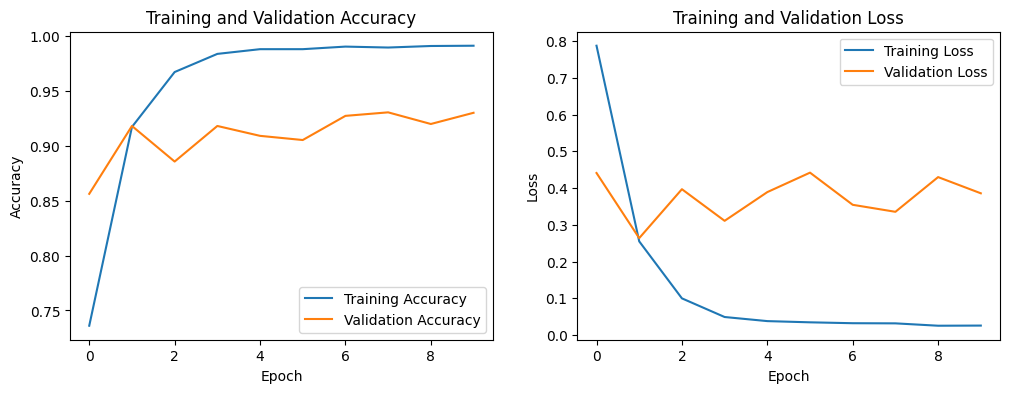

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator, steps=val_steps_per_epoch)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 108s 688ms/step - accuracy: 0.9328 - loss: 0.3907
Validation Loss: 0.3858
Validation Accuracy: 0.9303
